In [1]:
# Importação das bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Carregar o conjunto de dados
df = pd.read_csv('/content/abalone.data')

# Imprimir as primeiras linhas do DataFrame para uma visualização inicial dos dados
print(df.head())

   M  0.455  0.365  0.095   0.514  0.2245   0.101   0.15  15
0  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
1  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
2  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
3  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7
4  I  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.120   8


In [3]:
# Imprimir o número de variáveis (colunas) e instâncias (linhas) no DataFrame
print(f'Number of variables: {df.shape[1]}')
print(f'Number of instances: {df.shape[0]}')

Number of variables: 9
Number of instances: 4176


In [4]:
# Imprimir os nomes das colunas do DataFrame
print(df.columns)

Index(['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15',
       '15'],
      dtype='object')


In [5]:
# Verificar a quantidade de valores ausentes em cada coluna
print(df.isnull().sum())

M         0
0.455     0
0.365     0
0.095     0
0.514     0
0.2245    0
0.101     0
0.15      0
15        0
dtype: int64


In [6]:
# Redefinindo o DataFrame com os nomes das colunas
# Foi verificado que o arquivo CSV não tinha cabeçalho, por isso a adição dos nomes das colunas
df = pd.read_csv('/content/abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])

In [7]:
# Estatísticas descritivas básicas do DataFrame
print(df.describe())

            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

In [8]:
# Informações sobre os tipos de dados de cada coluna e quantidade de valores não nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None


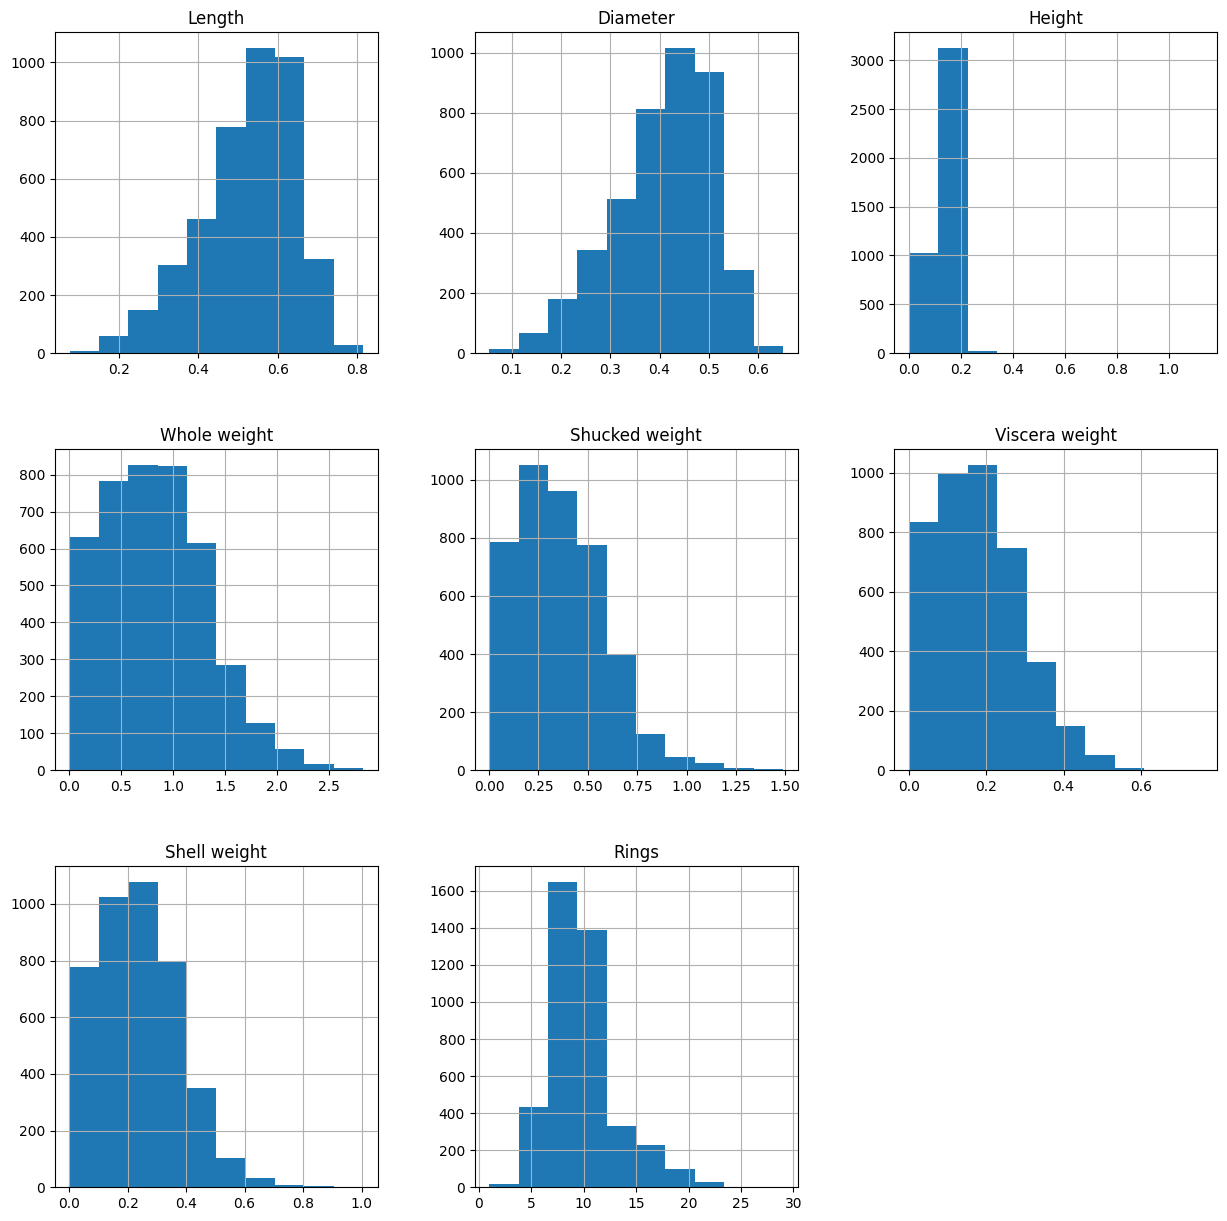

In [9]:
# Histograma para cada variável numérica
df.hist(figsize=(15, 15))
plt.show()

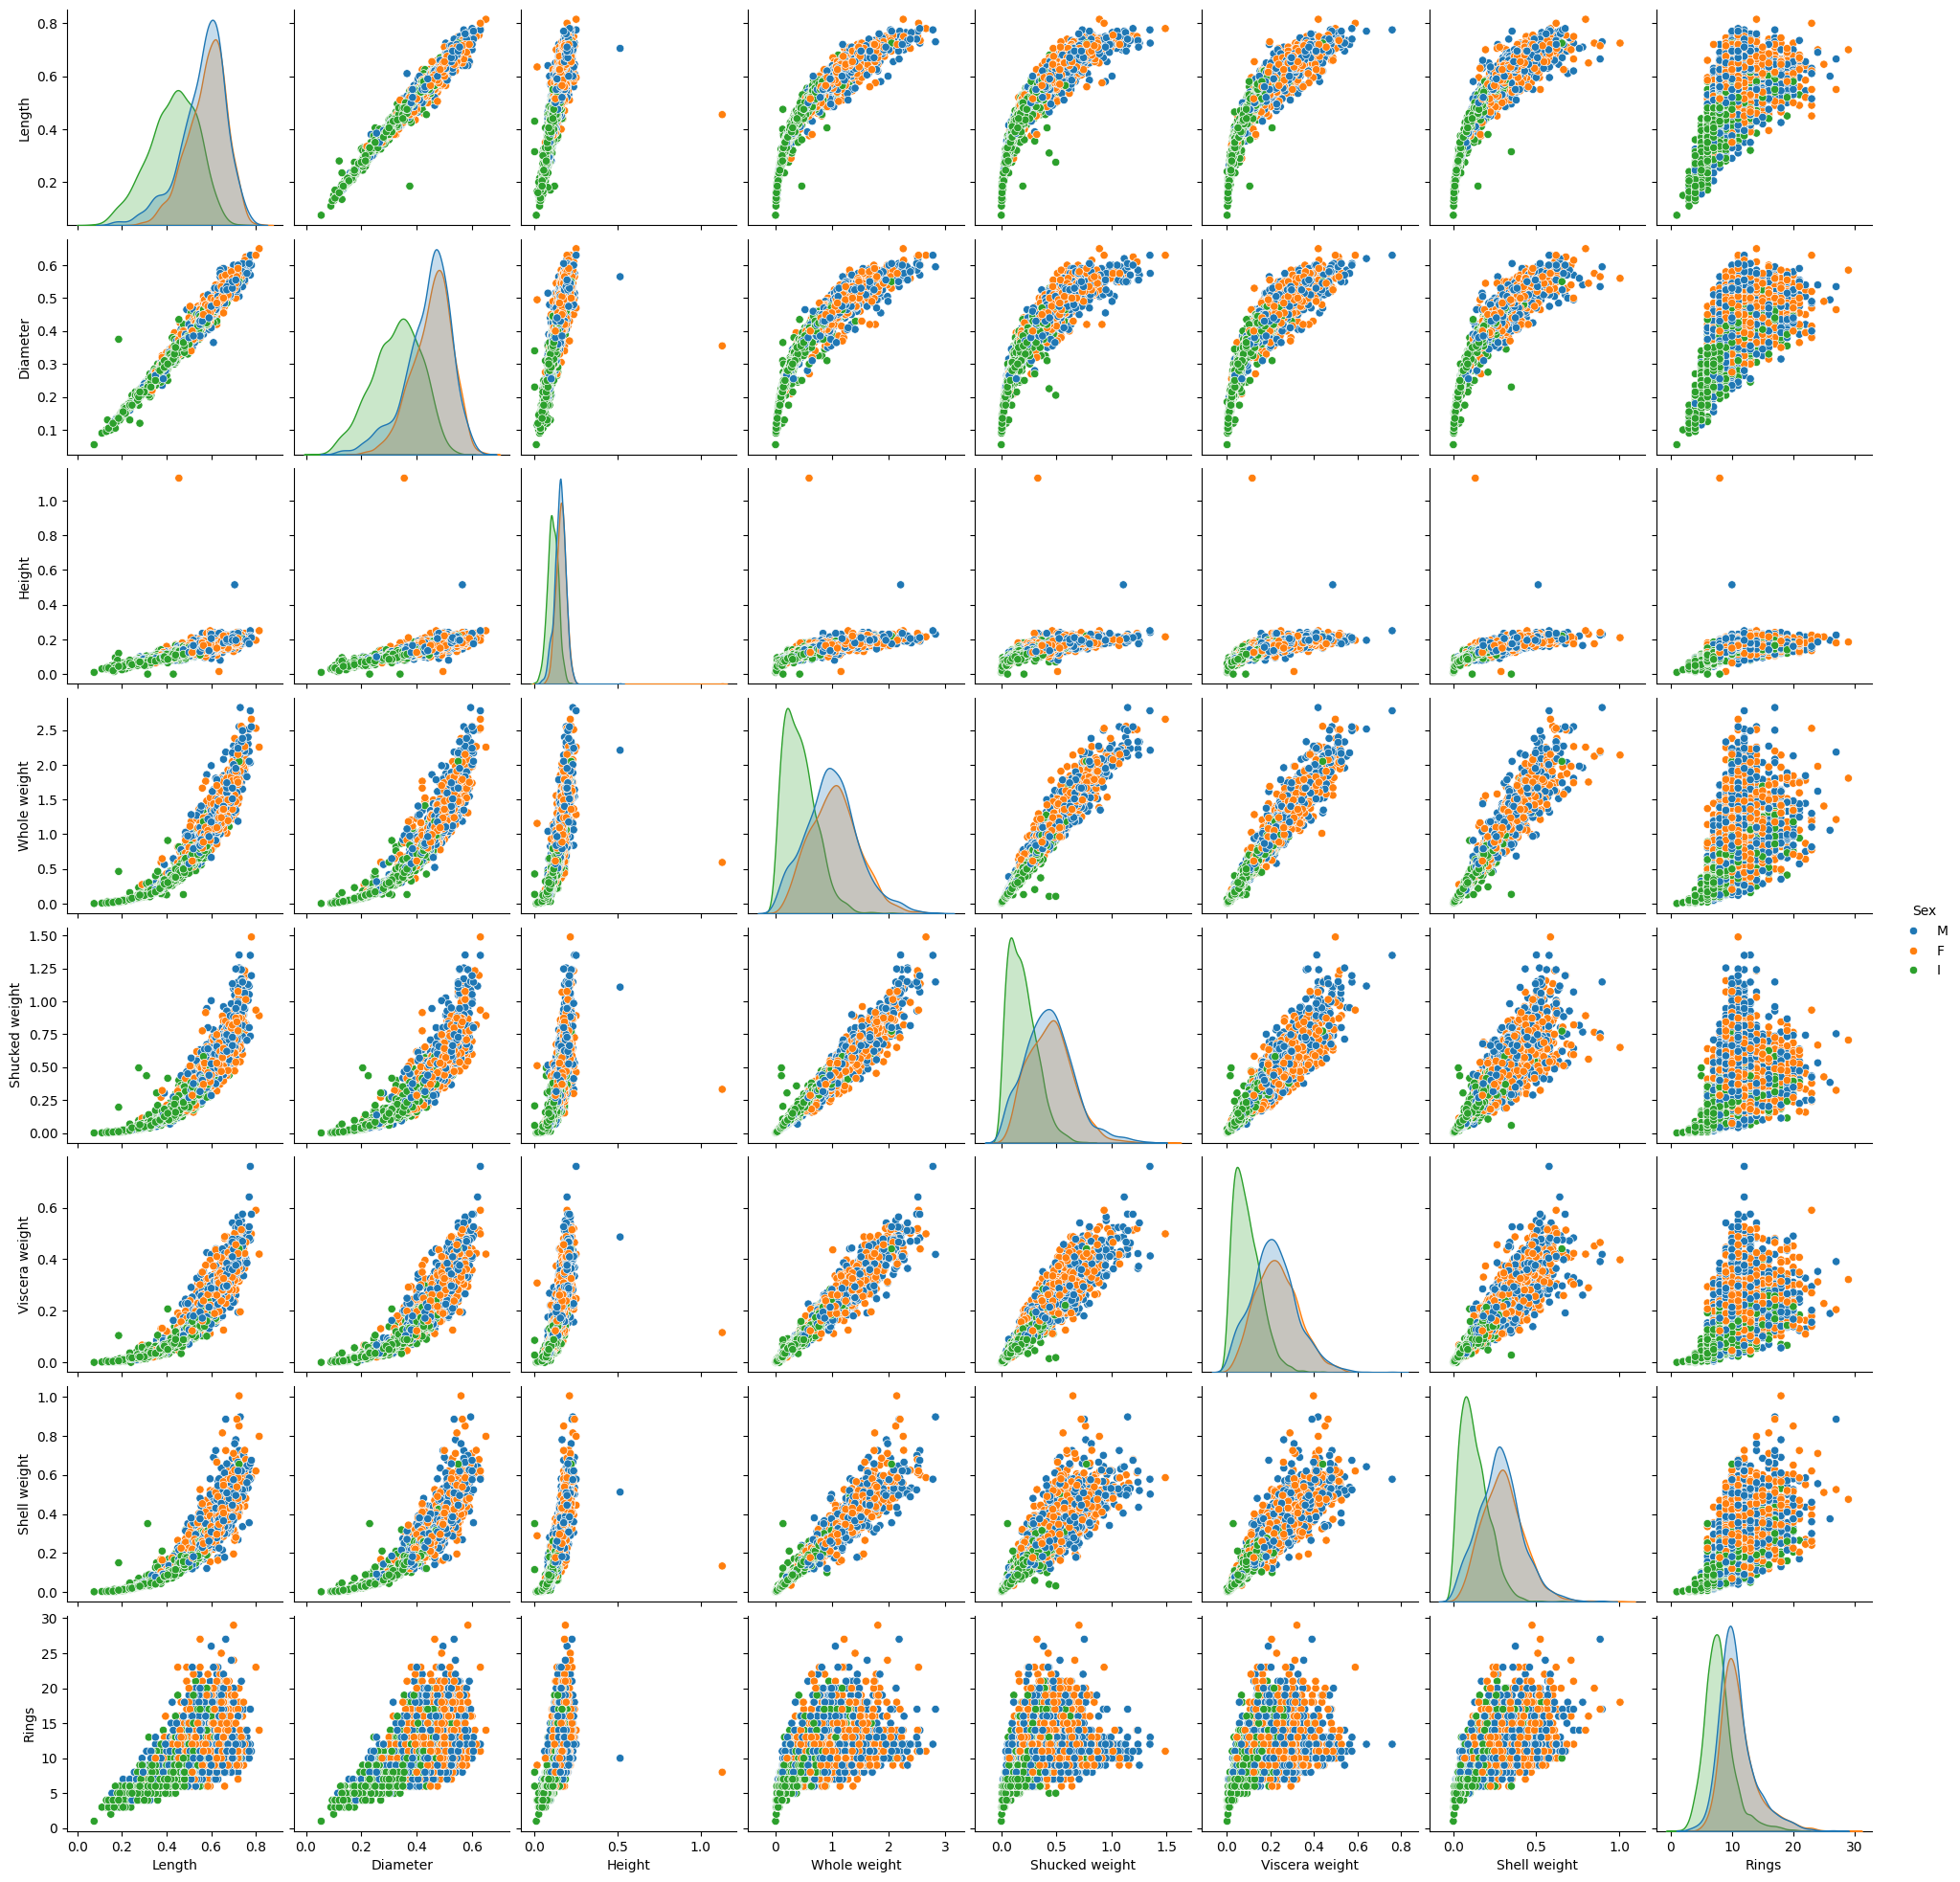

In [10]:
# Matriz de dispersão para visualizar a relação entre pares de variáveis
# Usando 'Sex' para colorir os pontos e diag_kind='kde' para visualizar a densidade das distribuições
sns.pairplot(df, hue='Sex', diag_kind='kde')
plt.show()

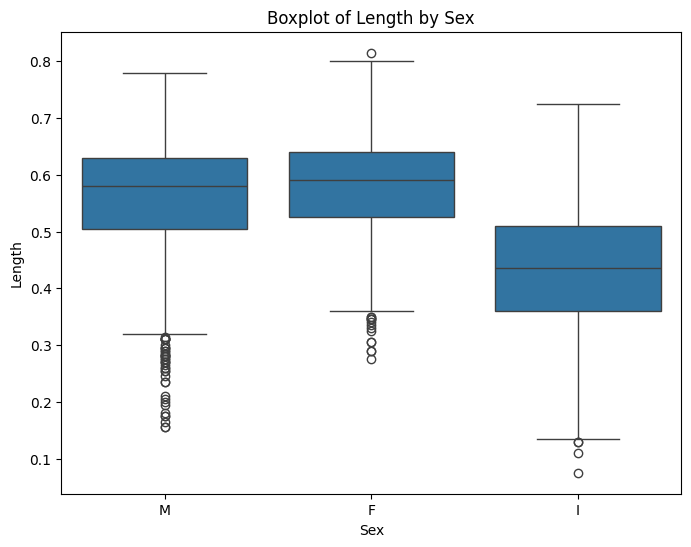

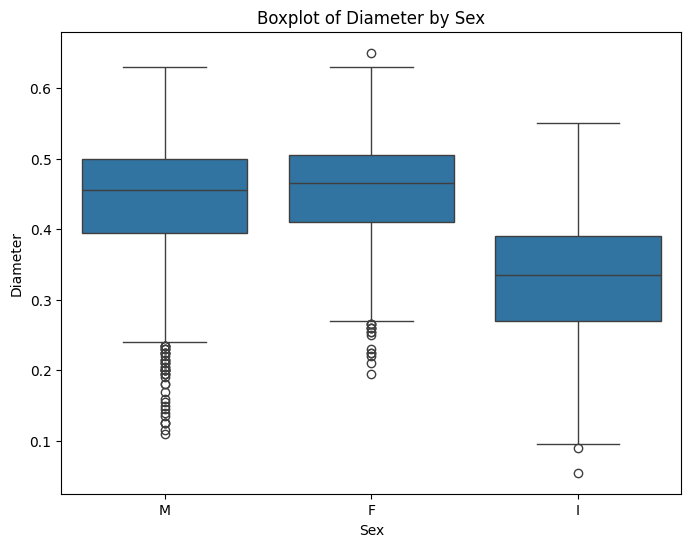

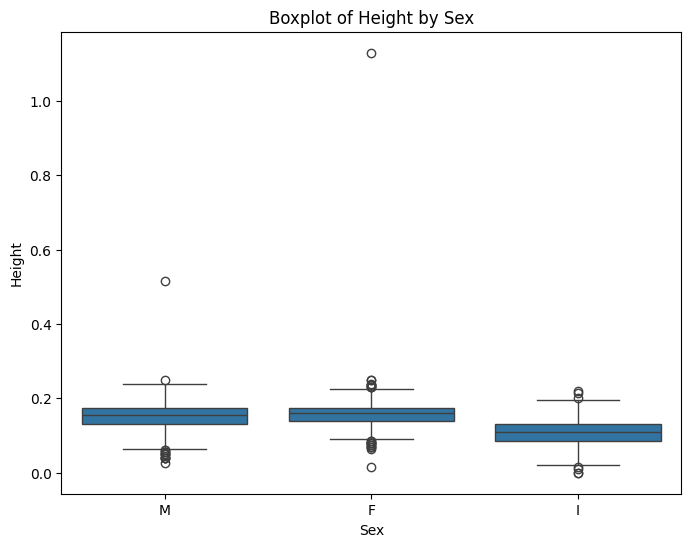

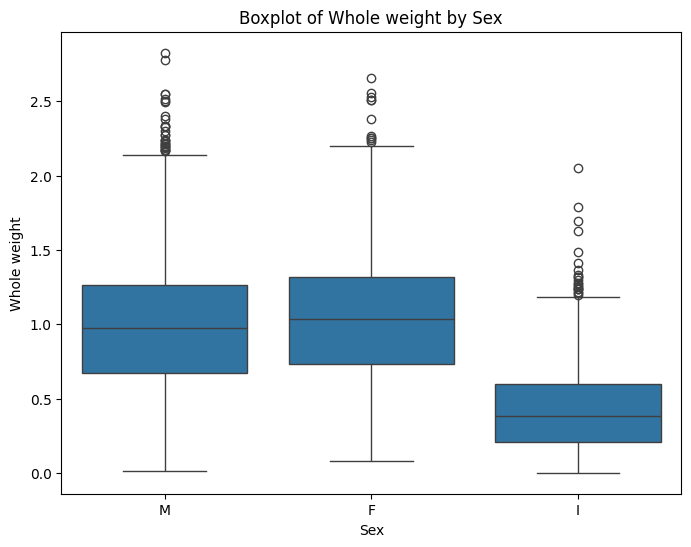

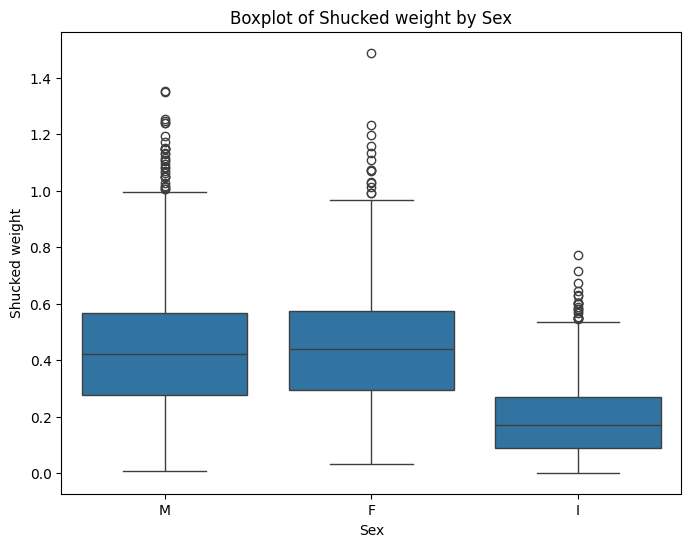

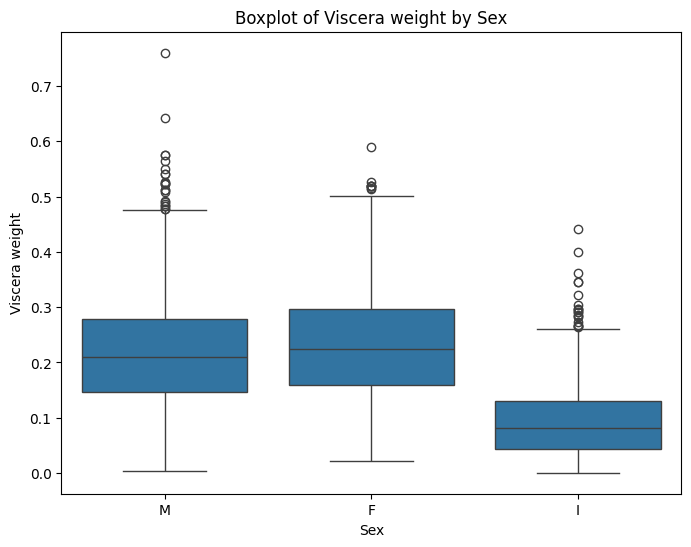

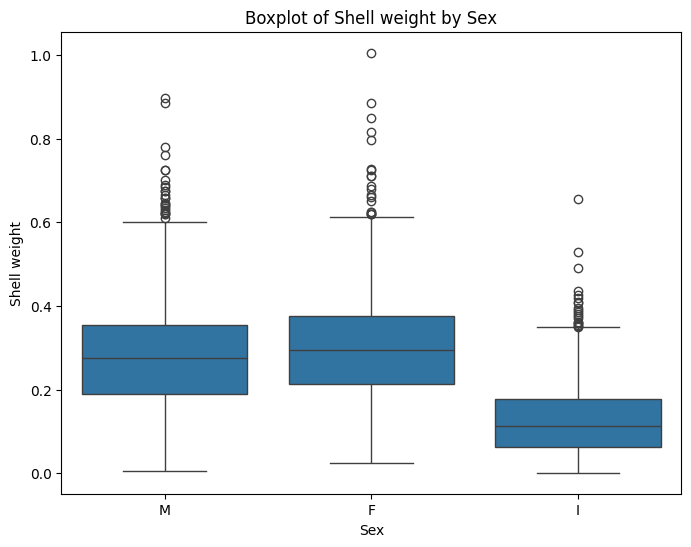

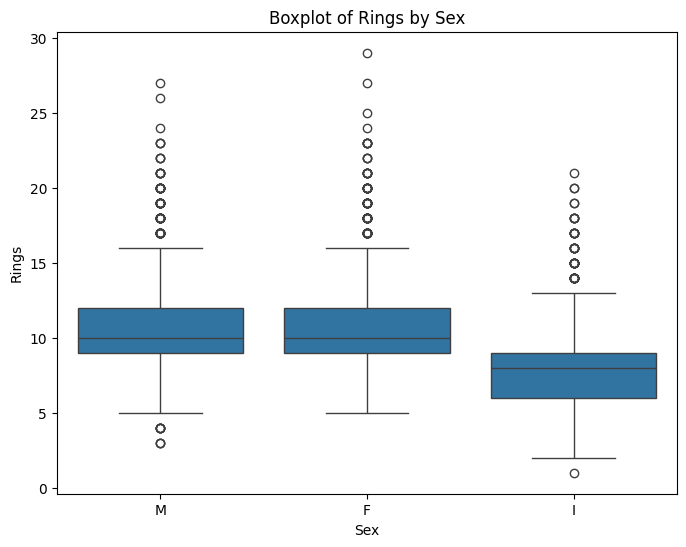

In [11]:
# Boxplots para cada variável numérica, separados pelo sexo
for col in ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Sex', y=col, data=df)
    plt.title(f'Boxplot of {col} by Sex')
    plt.show()

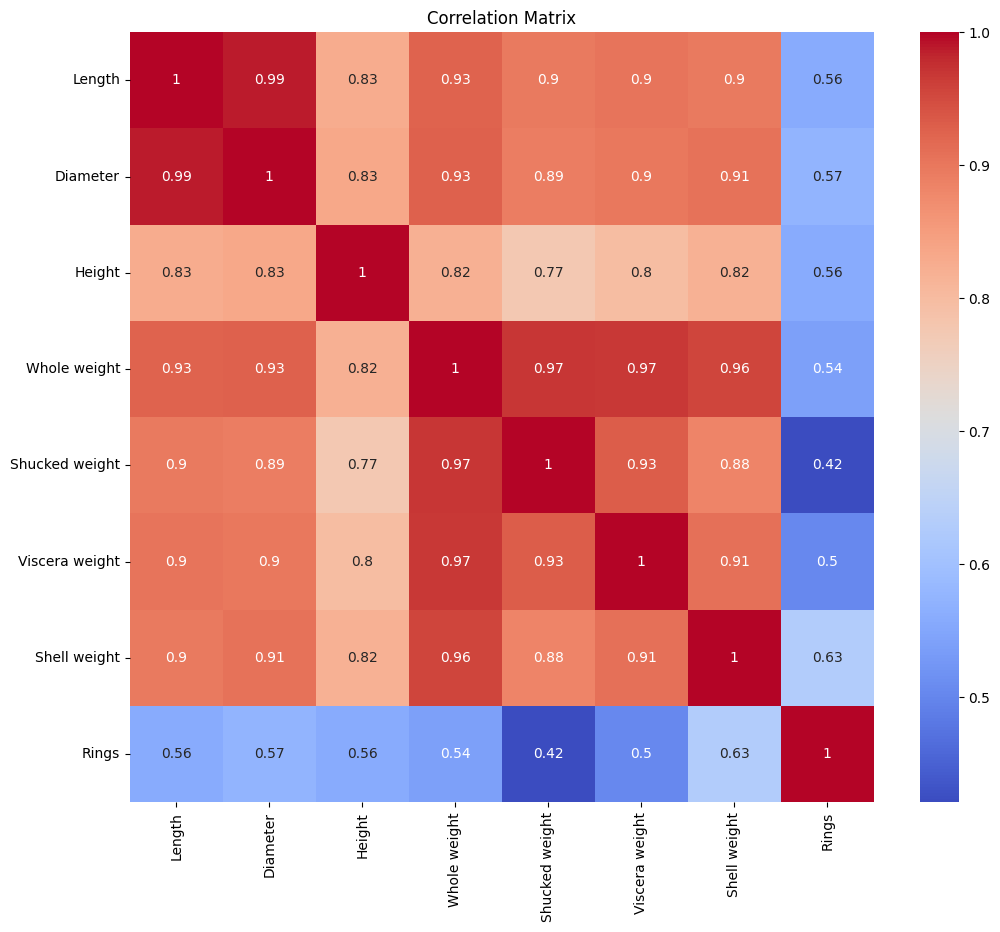

In [12]:
# Matriz de correlação entre as variáveis numéricas (excluindo a variável categórica 'Sex')
correlation_matrix = df.drop(columns=['Sex']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

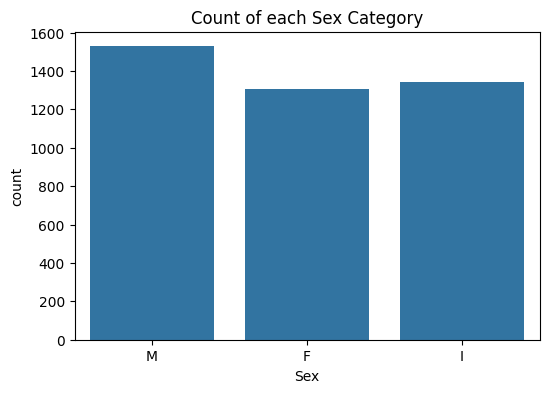

In [13]:
# Gráfico de contagem da variável 'Sex'
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df)
plt.title('Count of each Sex Category')
plt.show()

In [14]:
# Converter a coluna 'Sex' em variáveis numéricas usando one-hot encoding
# 'drop_first=True' remove uma das colunas criadas para evitar multicolinearidade
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Definir as variáveis independentes (X) e a variável dependente (y)
X = df.drop('Rings', axis=1)  # Variáveis preditoras
y = df['Rings']  # Variável alvo

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo usando MSE e R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4.891232447128576
R-squared: 0.5481628137889265


In [15]:
# Considerações sobre o modelo
# O modelo de regressão linear pode não ser o mais adequado para este conjunto de dados,
# devido à possível não linearidade entre as variáveis e possíveis problemas de multicolinearidade.
# O R² e o MSE sugerem que o modelo pode não descrever bem a variabilidade dos dados.
# São necessários outros modelos e/ou transformações dos dados para ter um bom resultado.

**Considerações sobre o modelo**
- O modelo de regressão linear pode não ser o mais adequado para este conjunto de dados,
- devido à possível não linearidade entre as variáveis e possíveis problemas de multicolinearidade.
- O R² e o MSE sugerem que o modelo pode não descrever bem a variabilidade dos dados.
- São necessários outros modelos e/ou transformações dos dados para ter um bom resultado.